In [106]:
# Import for this notebook 
%config Completer.use_jedi=False

import numpy as np

import sacc
import matplotlib.pyplot as plt 
import sys
sys.path.append("/home/foliveira/programs/lsst/TJPCov/tjpcov")
import importlib
import pickle
plt.rcParams.update({"figure.dpi":120, "font.family":"Serif"})


# Validation Files & auxiliar functions

In [101]:
with open("../tests/data/tjpcov_cl.pkl", "rb") as ff:
    cov0cl = pickle.load(ff)
    
with open("../tests/data/tjpcov_xi.pkl", "rb") as ff:
    cov0xi = pickle.load(ff)

def plot_corr(covmatrix):
    err=np.sqrt(np.diag(covmatrix))

    plt.imshow(covmatrix/ np.outer(err, err), 
               vmin=-1, vmax=1, 
               cmap='bwr', 
              origin='lower')
    plt.colorbar()

def rld():
    importlib.reload(cv)
    tjp = cv.CovarianceCalculator(cosmo_fn=cosmo_filename, sacc_fn_cl=cl_fn, sacc_fn_xi=xi_fn)
    return tjp 

# Importing the API

For now, you can import the api using the line below:

In [102]:
import main as cv

## INPUT FILES
The input files are: 

- `cosmo` object or yaml file, created by `pyccl`
- `cl` (Angular Power Spectrum) object from `sacc`
- `xi` (Angular Correlation Function) object from `sacc`

In [103]:
# cosmo object
with open("../tests/data/cosmos_desy1_v2p1p0.pkl", 'rb') as ff:
        cosmo = pickle.load(ff)

# YAML example        
cosmo_filename = "../tests/data/cosmo_desy1.yaml"

# sacc objects
xi_fn = "../examples/des_y1_3x2pt/generic_xi_des_y1_3x2pt_sacc_data.fits"
cl_fn = "../examples/des_y1_3x2pt/generic_cl_des_y1_3x2pt_sacc_data.fits"

# Starting the API

In [5]:
tjpcov = cv.CovarianceCalculator(cosmo_fn=cosmo,   # CCL cosmo object or yaml from CCL
                                 sacc_fn_cl=cl_fn, # sacc object with APS data 
                                 sacc_fn_xi=xi_fn  # sacc object with ACF data
                                )

Preparing WT...
Done!


## Covariance Matrix for Harmonic Space

Its simple to get the covariance matrix for all tracers and bins:

In [6]:
covall = tjpcov.get_all_cov()

Producing covariance with 840x840 points (35 combinations of tracers)
1/35
2/35
3/35
4/35
5/35
6/35
7/35
8/35
9/35
10/35
11/35
12/35
13/35
14/35
15/35
16/35
17/35
18/35
19/35
20/35
21/35
22/35
23/35
24/35
25/35
26/35
27/35
28/35
29/35
30/35
31/35
32/35
33/35
34/35
35/35


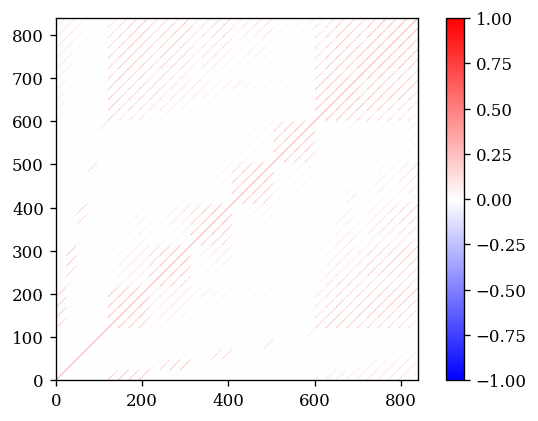

In [107]:
plot_corr(covall)

Checking your setup: 

In [61]:
ccl_tracers, tracer_Noise = tjpcov.get_tracer_info(tjpcov.cl_data)
tracer_combinations = tjpcov.cl_data.get_tracer_combinations()

print("Tracers:")
for k,v in ccl_tracers.items():
    print(f"\t{k}\t{v}")

print("\n\nNoise:")    
for k,v in tracer_Noise.items():
    print(f"\t{k}\t{v}")

print("\n\nCombinations:")
for i, v in enumerate(tracer_combinations):
    print(f"\t{i:2d} -- {v}")

Tracers:
	lens0	<pyccl.tracers.NumberCountsTracer object at 0x7f37ccce7dd8>
	lens1	<pyccl.tracers.NumberCountsTracer object at 0x7f37ccce7588>
	lens2	<pyccl.tracers.NumberCountsTracer object at 0x7f37ccce76a0>
	lens3	<pyccl.tracers.NumberCountsTracer object at 0x7f37ccce7518>
	lens4	<pyccl.tracers.NumberCountsTracer object at 0x7f37ccce76d8>
	src0	<pyccl.tracers.WeakLensingTracer object at 0x7f37ccce74a8>
	src1	<pyccl.tracers.WeakLensingTracer object at 0x7f37ccce7780>
	src2	<pyccl.tracers.WeakLensingTracer object at 0x7f37ccce7cc0>
	src3	<pyccl.tracers.WeakLensingTracer object at 0x7f37ccce7828>


Noise:
	lens0	3.254459613105861e-09
	lens1	3.254459613105861e-09
	lens2	3.254459613105861e-09
	lens3	3.254459613105861e-09
	lens4	3.254459613105861e-09
	src0	2.2000146984595622e-10
	src1	2.2000146984595622e-10
	src2	2.2000146984595622e-10
	src3	2.2000146984595622e-10


Combinations:
	 0 -- ('lens0', 'lens0')
	 1 -- ('lens1', 'lens1')
	 2 -- ('lens2', 'lens2')
	 3 -- ('lens3', 'lens3')
	 4 --

## Covariance for a Single Combination

In [89]:
gcov_cl_1 = tjpcov.cl_gaussian_cov(tracer_comb1=('lens0', 'lens0'),
                                 tracer_comb2=('lens0', 'lens0'),
                                 ccl_tracers=ccl_tracers,
                                 tracer_Noise=tracer_Noise,
                                 two_point_data=tjpcov.cl_data)

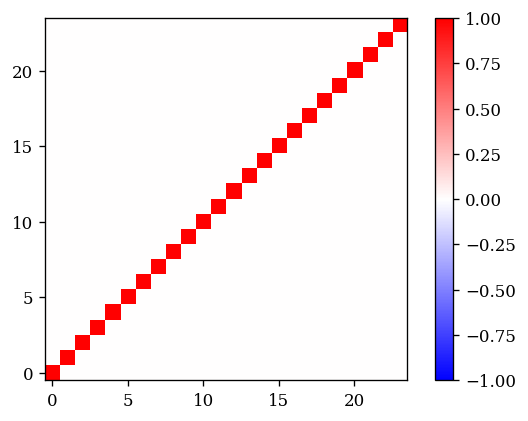

In [90]:
plot_corr(gcov_cl_1['final_b'])

## Single Tracer Covariance:

In [11]:
ccl_tracers, tracer_Noise = tjpcov.get_tracer_info(tjpcov.cl_data)


In [13]:
gcov_cl_1 = tjpcov.cl_gaussian_cov(tracer_comb1=('lens0', 'lens0'),
                             tracer_comb2=('lens0', 'lens0'),
                             ccl_tracers=ccl_tracers,
                             tracer_Noise=tracer_Noise,
                             two_point_data=tjpcov.cl_data)

# Configuration Space 

Evaluating the covariance matrix in configuration space is also easy

In [14]:
covall_xi = tjpcov.get_all_cov(do_xi=True)

Producing covariance with 700x700 points (35 combinations of tracers)
1/35
2/35
3/35
4/35
5/35
6/35
7/35
8/35
9/35
10/35
11/35
12/35
13/35
14/35
15/35
16/35
17/35
18/35
19/35
20/35
21/35
22/35
23/35
24/35
25/35
26/35
27/35
28/35
29/35
30/35
31/35
32/35
33/35
34/35
35/35


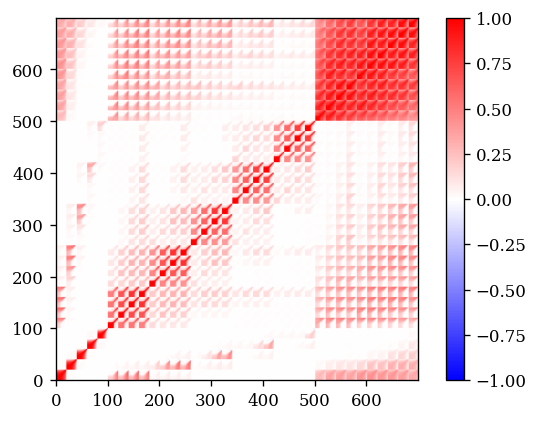

In [108]:
plot_corr(covall_xi)

## Covariance for a single combination

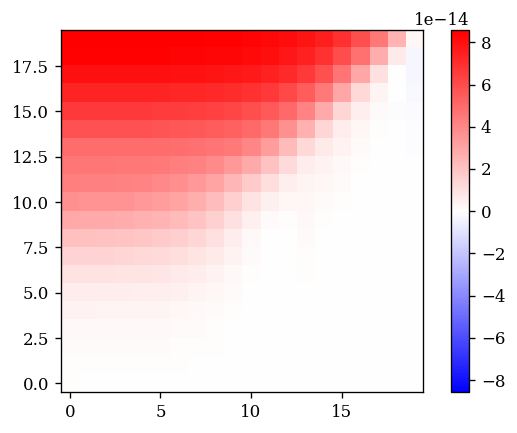

In [163]:
gcov_xi_1 = tjpcov.cl_gaussian_cov(tracer_comb1=('lens0', 'src3'),
                             tracer_comb2=('src0', 'src0'),
                             ccl_tracers=ccl_tracers,
                             tracer_Noise=tracer_Noise,
                             two_point_data=tjpcov.cl_data,
                             do_xi=True )

mx = gcov_xi_1['final_b'].max()
plt.imshow(gcov_xi_1['final_b'], vmin=-mx, vmax=mx, origin='lower', cmap='bwr')
plt.colorbar()